### exercise 9: unsupervised learning 

### task 1: k means assumptions 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
n_samples = 1500
random_state = 170

#default value for the number of centers is 3
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [3]:
# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

In [4]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred_aniso = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

In [5]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred_varied = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

In [6]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred_filtered = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

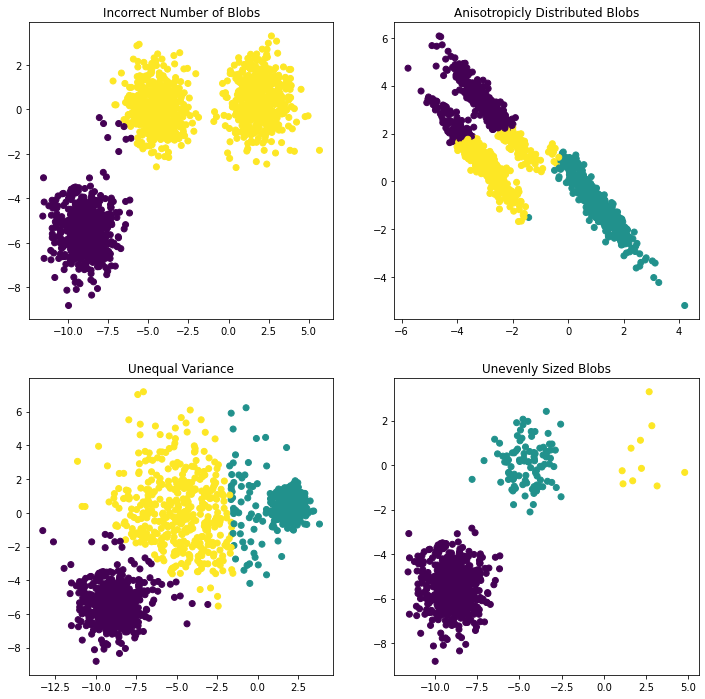

In [7]:
plt.figure(figsize=(12, 12))

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred_aniso)
plt.title("Anisotropicly Distributed Blobs")

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred_varied)
plt.title("Unequal Variance")

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred_filtered)
plt.title("Unevenly Sized Blobs")

plt.show()